
# Chapter 4 -> Spark ETL with AWS (S3 bucket)

Task to do 
1. Install required spark libraries
2. Create connection with AWS S3 bucket
3. Read data from S3 bucket and store into dataframe
4. Transform data
5. write data into parquet file 
6. write data into JSON file

Reference:
https://registry.opendata.aws/speedtest-global-performance/

command:<br/>
aws s3 ls --no-sign-request s3://ookla-open-data/parquet/performance/type=fixed/year=2019/quarter=1/2019-01-01_performance_fixed_tiles.parquet <br/>
aws s3 cp --no-sign-request s3://ookla-open-data/parquet/performance/type=fixed/year=2019/quarter=1/2019-01-01_performance_fixed_tiles.parquet sample.parquet

In [1]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [2]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter4")\
       .config("fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.AnonymousAWSCredentialsProvider") \
       .getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/05 05:44:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/05 05:44:42 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/03/05 05:44:42 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


Use AWS CLI to check folder structure

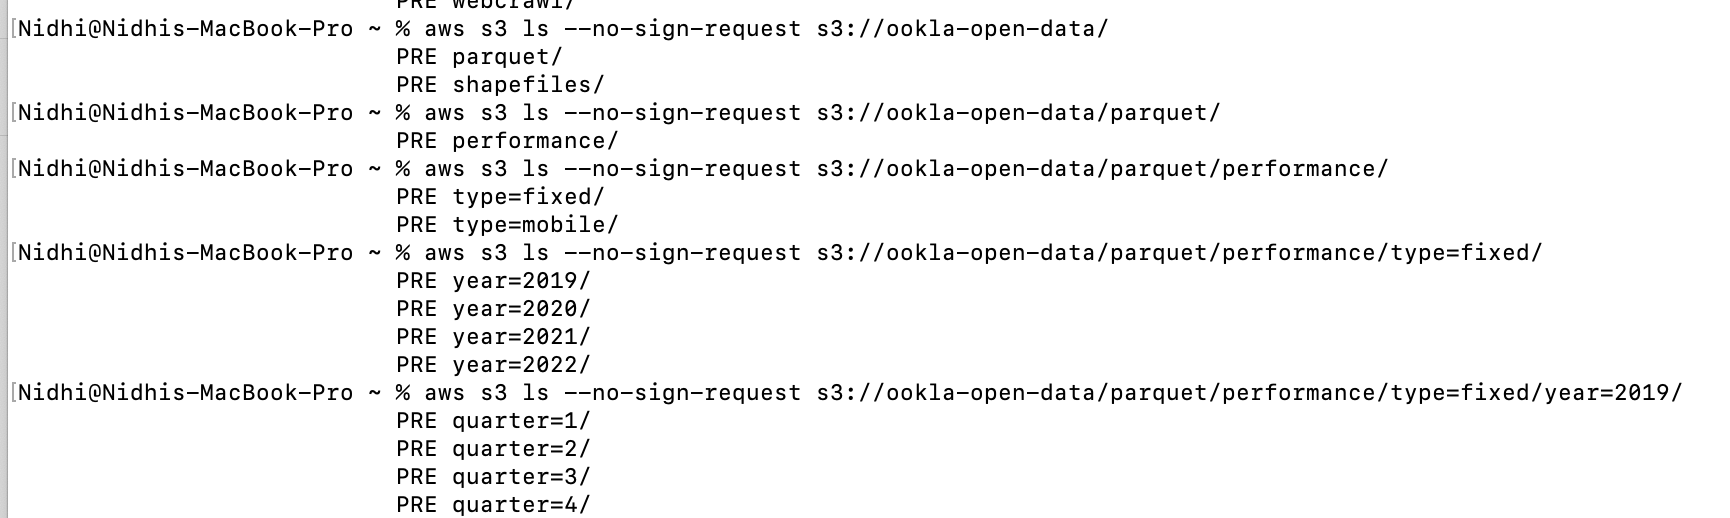

You can also download sample parquet file 

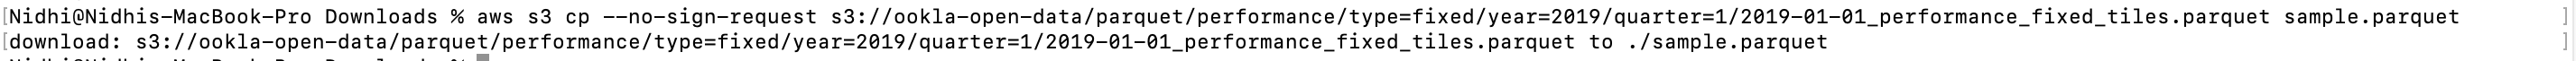

2. Create connection with AWS S3 bucket
3. Read data from S3 bucket and store into dataframe

In [3]:
df = spark.read.parquet("s3a://ookla-open-data/parquet/performance/type=fixed/year=2019/quarter=1/2019-01-01_performance_fixed_tiles.parquet")

In [4]:
df.printSchema()

root
 |-- quadkey: string (nullable = true)
 |-- tile: string (nullable = true)
 |-- avg_d_kbps: long (nullable = true)
 |-- avg_u_kbps: long (nullable = true)
 |-- avg_lat_ms: long (nullable = true)
 |-- tests: long (nullable = true)
 |-- devices: long (nullable = true)



In [ ]:
df.show()

4. Transform data

In [7]:
print('Register the DataFrame as a SQL temporary view: source')
df.createOrReplaceTempView('tempSource')

Register the DataFrame as a SQL temporary view: source


In [8]:
print('Displaying top 10 rows: ')
display(spark.sql('SELECT * FROM tempSource LIMIT 10'))

Displaying top 10 rows: 


DataFrame[quadkey: string, tile: string, avg_d_kbps: bigint, avg_u_kbps: bigint, avg_lat_ms: bigint, tests: bigint, devices: bigint]

In [ ]:
newdf = spark.sql('SELECT * FROM tempSource LIMIT 10')

5. write data into parquet file 
6. write data into JSON file

In [ ]:
newdf.write.format("parquet").option("compression","snappy").save("parquetdata",mode='append')

In [ ]:
newdf.write.format("csv").option("header","true").save("csvdata",mode='append')